Excluded problem BA3K-M

## Task 1 : BA4A


In [3]:
def get_codon_table():
  table= '''UUU F      CUU L      AUU I      GUU V
            UUC F      CUC L      AUC I      GUC V
            UUA L      CUA L      AUA I      GUA V
            UUG L      CUG L      AUG M      GUG V
            UCU S      CCU P      ACU T      GCU A
            UCC S      CCC P      ACC T      GCC A
            UCA S      CCA P      ACA T      GCA A
            UCG S      CCG P      ACG T      GCG A
            UAU Y      CAU H      AAU N      GAU D
            UAC Y      CAC H      AAC N      GAC D
            UAA Stop   CAA Q      AAA K      GAA E
            UAG Stop   CAG Q      AAG K      GAG E
            UGU C      CGU R      AGU S      GGU G
            UGC C      CGC R      AGC S      GGC G
            UGA Stop   CGA R      AGA R      GGA G
            UGG W      CGG R      AGG R      GGG G '''
  table = table.split()
  return dict(zip(table[0::2],table[1::2]))

# def RNA_to_Amino_Acid(rna):
#   amino_acid=""
#   dict1=get_codon_table()
#   for i in range(0,len(rna),3):
#     temp=rna[i:i+3]
#     print(temp)
#     print(dict1[temp])
#     amino_acid+=dict1[temp]
#   print(amino_acid)
#   return amino_acid

def RNA_to_Amino_Acid(rna):
  codon_dict=get_codon_table()
  print()
  return ''.join(codon_dict[rna[i:i+3]] for i in range(0,len(rna),3) if codon_dict[rna[i:i+3]]!='Stop')

print(RNA_to_Amino_Acid("AUGGCCAUGGCGCCCAGAACUGAGAUCAAUAGUACCCGUAUUAACGGGUGA"))


MAMAPRTEINSTRING


## Task 2 : BA4B

In [4]:
import itertools
from collections import defaultdict

def reverse(seq):
  complement = dict(zip('ACGT','TGCA'))
  return ''.join(complement[base] for base in seq[::-1])

def get_anti_codon_dict():
  codon_dict=get_codon_table()
  anti_codon_dict = defaultdict(list)
  for k,v in codon_dict.items():
    anti_codon_dict[v].append(k)
  return anti_codon_dict

def peptide_to_dna(peptide):
  anti_codon_dict=get_anti_codon_dict()
  rna_list = [anti_codon_dict[a] for a in peptide]
  return [''.join(s).replace('U','T') for s in itertools.product(*rna_list)]

def reverse_translate(dna,peptide):
  candidate_dna_list = peptide_to_dna(peptide)
  candidate_dna_list +=[reverse(d) for d in candidate_dna_list]
  k=len(peptide)*3
  return [dna[i:i+k] for i in range(len(dna)-k+1) if dna[i:i+k] in candidate_dna_list]

dna="ATGGCCATGGCCCCCAGAACTGAGATCAATAGTACCCGTATTAACGGGTGA"
peptide="MA"
print('\n'.join(reverse_translate(dna,peptide)))

ATGGCC
GGCCAT
ATGGCC


## Task 3 : BA4C

In [5]:
def get_mess():
  return {
      'G':57 , 'A':71 , 'S':87 , 'P': 97 ,'V':99 ,
      'T':101, 'C':103, 'I':113, 'L':113 ,'N':114,
      'D':115, 'K':128, 'Q':128 ,'E':129 ,'M':131,
      'H':137, 'F':147, 'R':156, 'Y':163, 'W':186
  }
def Spectrum_Cyclic_Peptide(seq):
  mess=get_mess()
  k=len(seq);
  messes=[0]
  seq+=seq[0:k-1]
  for i in range(0,k,1):
    for j in range(i+1,i+k,1):
      temp=0;
      # print(seq[i:j])
      for l in range(i,j,1):
        temp+=mess[seq[l]]
      messes.append(temp)
  # print(messes)
  mass = 0
  for x in seq:
    mass += mess[x]
  messes.append(mass)
  return messes

seq="LEQN"
print(Spectrum_Cyclic_Peptide(seq))

[0, 113, 242, 370, 129, 257, 371, 128, 242, 355, 114, 227, 356, 854]


## Task 4 : BA4D

In [6]:
peptide_masses=[57 , 71 , 87 ,  97 ,99 ,
      101, 103, 113 ,114,
      115, 128 ,129 ,131,
      137, 147, 156, 163, 186]
def peptide_count_for_masses(mass):
  masses = [0]*(mass+1)
  masses[0] = 1
  for i in range(mass+1):
    for j in range(len(peptide_masses)):
      if i>=peptide_masses[j]:
        masses[i]+=masses[i-peptide_masses[j]]
  return masses[mass]

mass=1024
peptide_count_for_masses(mass)

14712706211

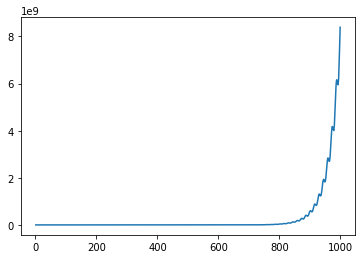

In [7]:
y=[]
x=[]
for i in range(1,1000,1):
  y.append(peptide_count_for_masses(i)) 
  x.append(i)
import matplotlib.pyplot as plt
plt.plot(x, y)

# Task 05: BA4J **Generate the Theoretical Spectrum of a Linear Peptide**

In [8]:
def get_mass():
  return {
      'G':57 , 'A':71 , 'S':87 , 'P': 97 ,'V':99 ,
      'T':101, 'C':103, 'I':113, 'L':113 ,'N':114,
      'D':115, 'K':128, 'Q':128 ,'E':129 ,'M':131,
      'H':137, 'F':147, 'R':156, 'Y':163, 'W':186
  }

def linear_spectrum(peptide):
  mass=get_mass()
  prefix_mass=[0]
  for i in range(0,len(peptide),1):
    prefix_mass.append( (mass[peptide[i]]+prefix_mass[i]) )
  linearSpectrum=[0]
  for i in range(0,len(peptide),1):
    for j in range(i+1,len(peptide)+1,1):
      linearSpectrum.append(prefix_mass[j]-prefix_mass[i])
  
  linearSpectrum.sort()
  return linearSpectrum

In [9]:
print(linear_spectrum("NQEL"))

[0, 113, 114, 128, 129, 242, 242, 257, 370, 371, 484]


# Task 06: BA4K **Compute the Score of a Linear Peptide**

In [10]:
def LinearScore(Peptide, Spectrum):
  LinearSpectrum=linear_spectrum(Peptide)
  track=0
  count=0

  for i in Spectrum:
    for j in range(track,len(LinearSpectrum)):
      if (i==LinearSpectrum[j]):
        track=track+1
        count=count+1
        break
  return count
Peptide="NQEL"
Spectrum='''0 99 113 114 128 227 257 299 355 356 370 371 484'''.split()
Spectrum=[eval(i) for i in Spectrum]

print(Peptide, Spectrum)
print(LinearScore(Peptide, Spectrum))

NQEL [0, 99, 113, 114, 128, 227, 257, 299, 355, 356, 370, 371, 484]
8


Excluded problem from sylebus 4M
